In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import datetime
from dateutil.relativedelta import relativedelta
import os
import seaborn as sns
from sklearn import metrics
import math
from keras.models import Sequential,load_model
from keras.layers import Dense
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from matplotlib import cm
import matplotlib
from collections import Counter
font_dirs = ['../font']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
font_list = font_manager.createFontList(font_files)
font_manager.fontManager.ttflist.extend(font_list)
matplotlib.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
path = "VDS기반 고속도로 지점별 교통 소통 통계 데이터/"
folder_list = os.listdir(path)

In [3]:
value_list = []

In [4]:
new_df = pd.DataFrame()
for folder_name in folder_list:
    df = pd.read_csv(path+folder_name)
    print(len(df))
    value_list.append(len(df))
    new_df = pd.concat([new_df,df])

7538
7538
7538
7538
7536
7857
7857


In [5]:
new_df = new_df.rename(columns={'AGGR_DATE':'집계일자',
                'VDS_ID':'VDS_ID',
                'ROAD_KIND_TP_SE_CD':'차로유형구분코드',
                'VMTC':'교통량',
                'SHARE':'점유율',
                'AVRG_VE':'평균속도',
                'NORMAL_CNT':'정상건수',
                'REVISION_CNT':'보정건수',
                'LAST_CHANGE_TIME':'최종변경시각'})

In [6]:
new_df.head()

,집계일자,VDS_ID,차로유형구분코드,교통량,점유율,평균속도,정상건수,보정건수,최종변경시각
0,20201012,0010VDE00100,1,38537,1.97,83.43,2875,5,20201013014734
1,20201012,0010VDE00200,1,36416,1.96,93.49,2725,26,20201013014734
2,20201012,0010VDE00300,1,37118,2.21,84.03,2833,47,20201013014734
3,20201012,0010VDE00400,1,-1,-1.00,-1.00,0,0,20201013014734
4,20201012,0010VDE00500,1,30693,1.40,93.77,2875,5,20201013014734


In [7]:
def change_content(x):
    if x==1:
        return "일반차로"
    if x==2:
        return "버스차로"

In [8]:
new_df['class'] = new_df['차로유형구분코드'].apply(lambda x: change_content(x))

In [9]:
line_labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
color_labels = ['blue','green','black','red','gray','deepskyblue','purple']

In [10]:
new_dff = new_df[['집계일자','교통량','점유율','평균속도','정상건수','보정건수']]

In [11]:
new_dff.head()

,집계일자,교통량,점유율,평균속도,정상건수,보정건수
0,20201012,38537,1.97,83.43,2875,5
1,20201012,36416,1.96,93.49,2725,26
2,20201012,37118,2.21,84.03,2833,47
3,20201012,-1,-1.00,-1.00,0,0
4,20201012,30693,1.40,93.77,2875,5


## heatmap

<AxesSubplot:title={'center':'7일 데이터'}>

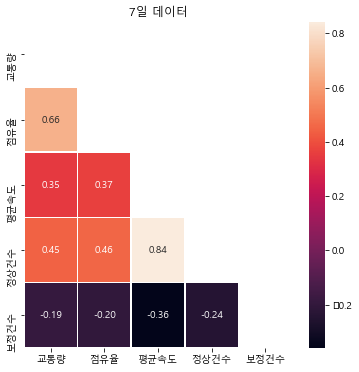

In [12]:
fig, ax = plt.subplots(figsize=(6, 6))                     
dff = new_dff.drop(columns=['집계일자'])
plt.title("7일 데이터")
corr = dff.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,mask=mask,linewidths=0.5,annot = True,fmt=".2f")
# fig.savefig("new_Image/전체.png",bbox_inches='tight',dpi=1000)

<AxesSubplot:title={'center':'월요일'}>

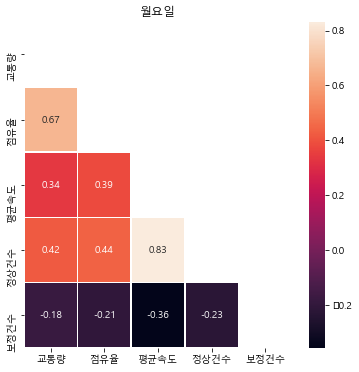

In [13]:
fig, ax = plt.subplots(figsize=(6, 6))                       #월 
plt.title("월요일")
new_df_1 = new_dff[new_dff['집계일자']==20201012]
del new_df_1['집계일자']
corr = new_df_1.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,mask=mask,linewidths=0.5,annot = True,fmt=".2f")
# fig.savefig("new_Image/월.png",bbox_inches='tight',dpi=1000)

<AxesSubplot:title={'center':'화요일'}>

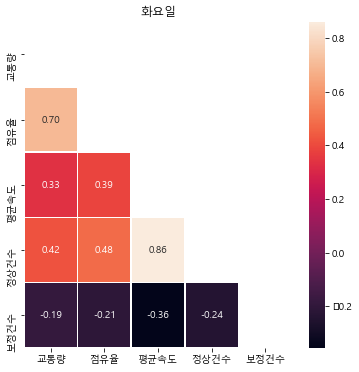

In [14]:
fig, ax = plt.subplots(figsize=(6, 6))                    # 화 
plt.title("화요일")
new_df_1 = new_dff[new_dff['집계일자']==20201013]
del new_df_1['집계일자']
corr = new_df_1.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,mask=mask,linewidths=0.5,annot = True,fmt=".2f")
# fig.savefig("new_Image/화.png",bbox_inches='tight',dpi=1000)

<AxesSubplot:title={'center':'수요일'}>

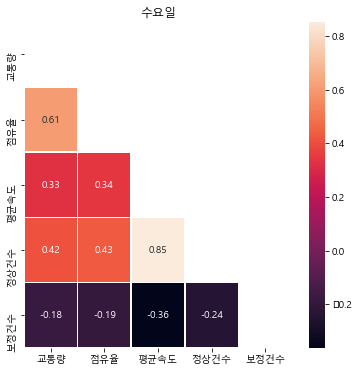

In [15]:
fig, ax = plt.subplots(figsize=(6, 6))                    # 수
plt.title("수요일")
new_df_1 = new_dff[new_dff['집계일자']==20201014]
del new_df_1['집계일자']
corr = new_df_1.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,mask=mask,linewidths=0.5,annot = True,fmt=".2f")
# fig.savefig("new_Image/수.png",bbox_inches='tight',dpi=1000)

<AxesSubplot:title={'center':'목요일'}>

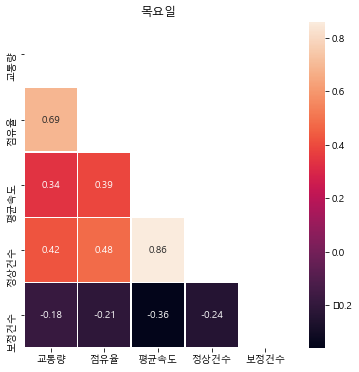

In [16]:
fig, ax = plt.subplots(figsize=(6, 6))                    # 목
plt.title("목요일")
new_df_1 = new_dff[new_dff['집계일자']==20201015]
del new_df_1['집계일자']
corr = new_df_1.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,mask=mask,linewidths=0.5,annot = True,fmt=".2f")
# fig.savefig("new_Image/목.png",bbox_inches='tight',dpi=1000)

<AxesSubplot:title={'center':'금요일'}>

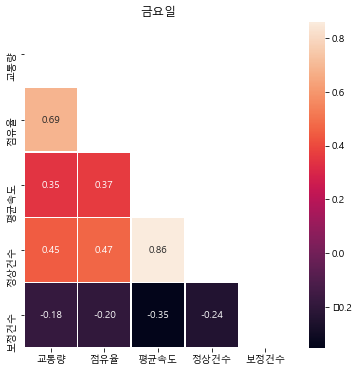

In [17]:
fig, ax = plt.subplots(figsize=(6, 6))                   # 금 
plt.title("금요일")
new_df_1 = new_dff[new_dff['집계일자']==20201016]
del new_df_1['집계일자']
corr = new_df_1.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,mask=mask,linewidths=0.5,annot = True,fmt=".2f")
# fig.savefig("new_Image/금.png",bbox_inches='tight',dpi=1000)

<AxesSubplot:title={'center':'토요일'}>

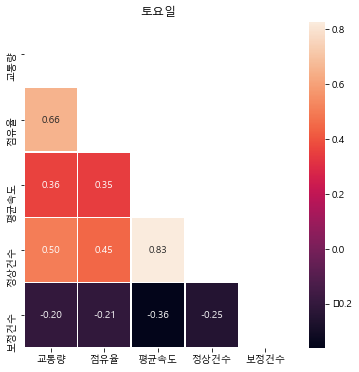

In [18]:
fig, ax = plt.subplots(figsize=(6, 6))                   # 토
plt.title("토요일")
new_df_1 = new_dff[new_dff['집계일자']==20201017]
del new_df_1['집계일자']
corr = new_df_1.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,mask=mask,linewidths=0.5,annot = True,fmt=".2f")
# fig.savefig("new_Image/토.png",bbox_inches='tight',dpi=1000)

<AxesSubplot:title={'center':'일요일'}>

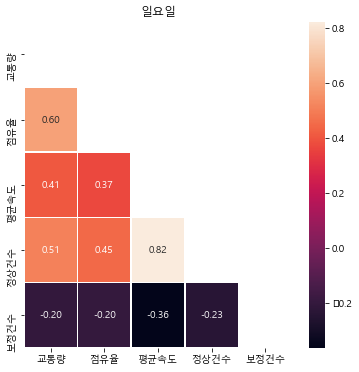

In [19]:
fig, ax = plt.subplots(figsize=(6, 6))                   # 일
plt.title("일요일")
new_df_1 = new_dff[new_dff['집계일자']==20201018]
del new_df_1['집계일자']
corr = new_df_1.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,mask=mask,linewidths=0.5,annot = True,fmt=".2f")
# fig.savefig("new_Image/일.png",bbox_inches='tight',dpi=1000)

In [20]:
color_dict_1 = dict({'일반차로': 'orange',
                   '버스차로': 'dodgerblue'})
color_dict_2 = dict({'일반차로': 'pink',
                   '버스차로': 'royalblue'})
color_dict_3 = dict({'일반차로': 'turquoise',
                   '버스차로': 'red'})
color_dict_4 = dict({'일반차로': 'gold',
                   '버스차로': 'lightcoral'})

## Scatter

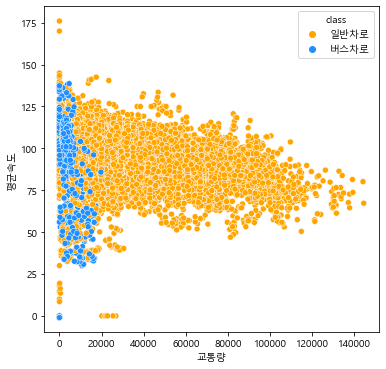

In [21]:
plt.figure(figsize=(6,6))
g = sns.scatterplot(x="교통량", y="평균속도", hue="class",
              data=new_df, palette=color_dict_1, 
                   legend='full')
# plt.savefig("new_Image/교통량_평균속도.png",dpi=600)

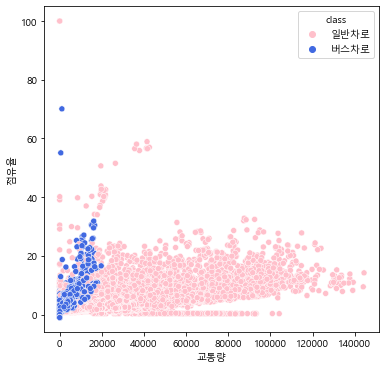

In [22]:
plt.figure(figsize=(6,6))
g = sns.scatterplot(x="교통량", y="점유율", hue="class",
              data=new_df, palette=color_dict_2, 
                   legend='full')

# plt.savefig("new_Image/교통량_점유율.png",dpi=600)

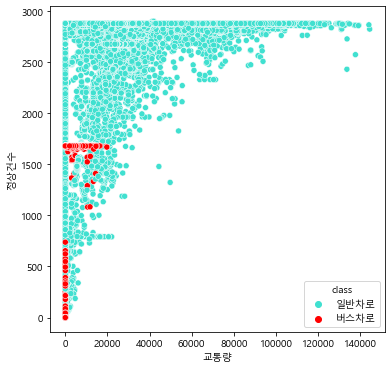

In [23]:
plt.figure(figsize=(6,6))
g = sns.scatterplot(x="교통량", y="정상건수", hue="class",
              data=new_df, palette=color_dict_3, 
                   legend='full')
# plt.savefig("new_Image/교통량_정상건수.png",dpi=600)

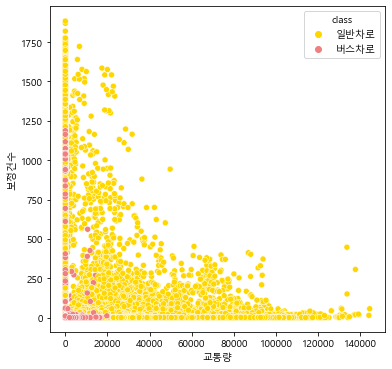

In [24]:
plt.figure(figsize=(6,6))
g = sns.scatterplot(x="교통량", y="보정건수", hue="class",
              data=new_df, palette=color_dict_4, 
                   legend='full')
# plt.savefig("new_Image/교통량_보정건수.png",dpi=600)

In [25]:
avg_df_1 = new_df[new_df['차로유형구분코드']==1].reset_index(drop=True)

In [26]:
VDS_list_Monday_1 = sorted([str(i)[:7] for i in avg_df_1[avg_df_1['집계일자']==20201012]['VDS_ID']])
VDS_list_Tuesday_1 = sorted([str(i)[:7] for i in avg_df_1[avg_df_1['집계일자']==20201013]['VDS_ID']])
VDS_list_Wednesday_1 = sorted([str(i)[:7] for i in avg_df_1[avg_df_1['집계일자']==20201014]['VDS_ID']])
VDS_list_Thursday_1 = sorted([str(i)[:7] for i in avg_df_1[avg_df_1['집계일자']==20201015]['VDS_ID']])
VDS_list_Friday_1 = sorted([str(i)[:7] for i in avg_df_1[avg_df_1['집계일자']==20201016]['VDS_ID']])
VDS_list_Saturday_1 = sorted([str(i)[:7] for i in avg_df_1[avg_df_1['집계일자']==20201017]['VDS_ID']])
VDS_list_Sunday_1 = sorted([str(i)[:7] for i in avg_df_1[avg_df_1['집계일자']==20201018]['VDS_ID']])

VDS_counter = Counter(VDS_list_Monday_1+VDS_list_Tuesday_1+VDS_list_Wednesday_1+VDS_list_Thursday_1+VDS_list_Friday_1+VDS_list_Saturday_1+VDS_list_Sunday_1)
VDS_counter_value = [VDS_counter[i] for i in VDS_counter.keys()] 
VDS_counter_categories = VDS_counter.keys()

VDS_df = pd.DataFrame(zip(VDS_counter_categories,VDS_counter_value))

In [27]:
import matplotlib.font_manager as fm
font_path = "../../malgun.ttf"
font_name = fm.FontProperties(fname=font_path,size=18).get_name()

In [28]:
new_VDS_df = VDS_df.rename(columns={0:'VDS',1:'count'})

In [29]:
new_VDS_df = new_VDS_df.sort_values(by='count',ascending=False).reset_index(drop=True)

In [30]:
new_VDS_df

,VDS,count
0,0010VDS,2933
1,0010VDE,2898
2,0450VDE,2037
3,0450VDS,2037
4,0500VDS,1785
...,...,...
99,3300VDE,42
100,0160VDS,35
101,0160VDE,35
102,0171VDS,14


In [31]:
a_500 = new_VDS_df[new_VDS_df['count']>500]
a_500

,VDS,count
0,0010VDS,2933
1,0010VDE,2898
2,0450VDE,2037
3,0450VDS,2037
4,0500VDS,1785
5,0500VDE,1757
6,0150VDE,1603
7,0150VDS,1603
8,0550VDS,1253
9,0550VDE,1239


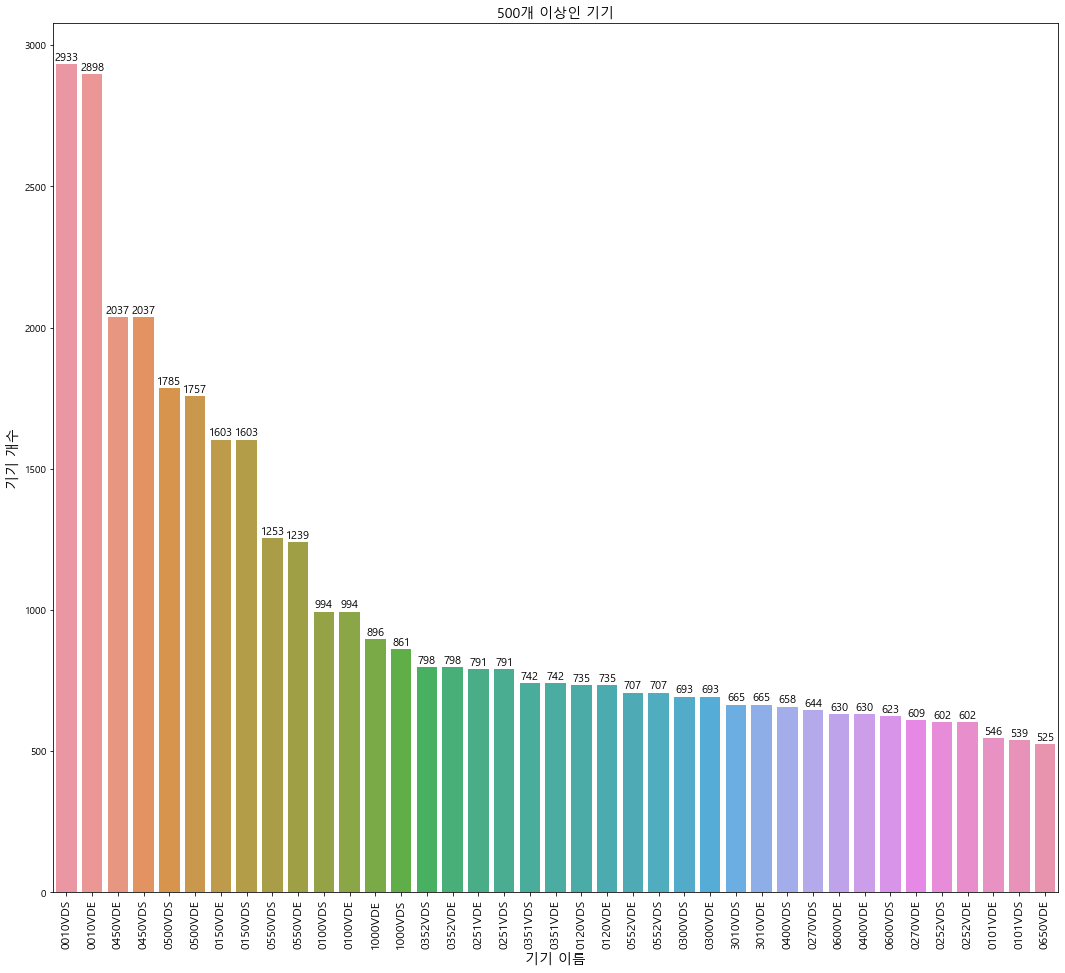

In [32]:
fig = plt.figure(figsize=(18, 6))
ax = sns.barplot(x='VDS',y='count',data = a_500)
for p in ax.patches:
    ax.annotate(format(int(p.get_height()), 'd'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 7), 
                   textcoords = 'offset points',
               fontsize=11)
ax.set_title('500개 이상인 기기', fontsize=14)
ax.set_ylabel('기기 개수', fontsize=14)
ax.set_xlabel('기기 이름', fontsize=14)
# ax.set_title("임산물품목별 데이터 수", fontsize=20)
ax.xaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(rotation=90)
fig.set_size_inches(18, 16)
# fig.savefig("Image/500.png",dpi=600)

In [33]:
b_500 = new_VDS_df[new_VDS_df['count']<500]
b_500_1 = b_500[b_500['count']>=150]

In [34]:
b_500_1

,VDS,count
39,0650VDS,490
40,0520VDE,434
41,0520VDS,434
42,0301VDE,385
43,0301VDS,385
44,0170VDS,385
45,0170VDE,385
46,1100VDE,364
47,1100VDS,364
48,0290VDS,315


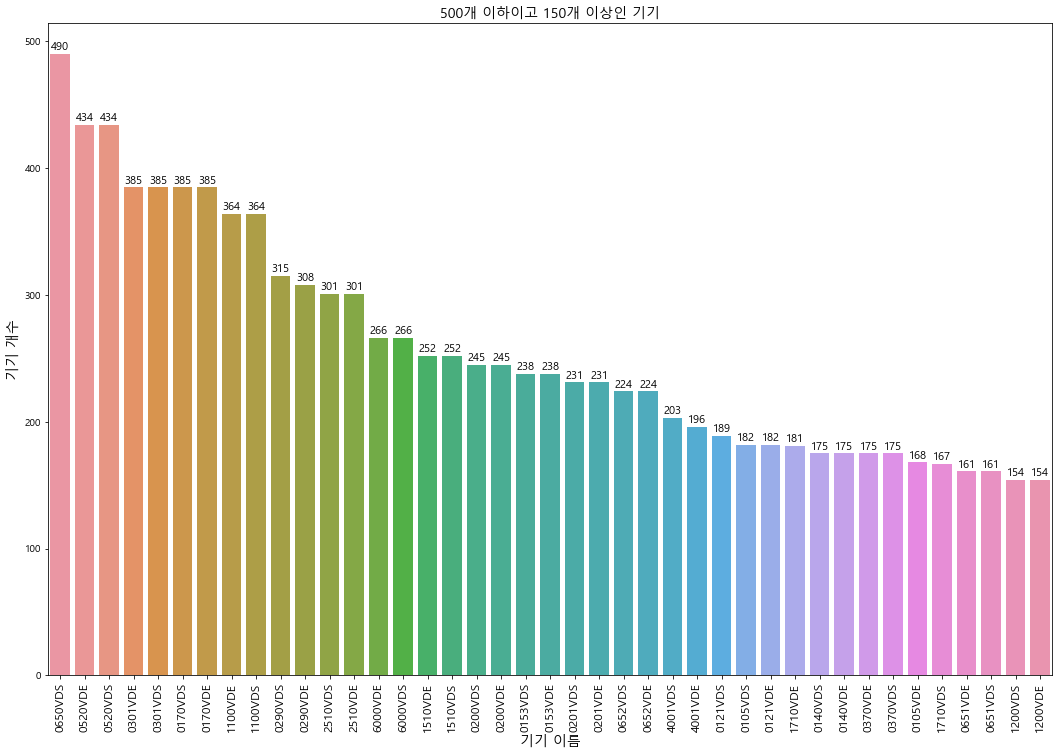

In [35]:
fig = plt.figure(figsize=(18, 6))
ax = sns.barplot(x='VDS',y='count',data = b_500_1)
for p in ax.patches:
    ax.annotate(format(int(p.get_height()), 'd'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 7), 
                   textcoords = 'offset points',
               fontsize=11)
ax.set_title('500개 이하이고 150개 이상인 기기', fontsize=14)
ax.set_ylabel('기기 개수', fontsize=14)
ax.set_xlabel('기기 이름', fontsize=14)
# ax.set_title("임산물품목별 데이터 수", fontsize=20)
ax.xaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(rotation=90)
fig.set_size_inches(18, 12)
# fig.savefig("Image/150보다 작음.png",dpi=600)

In [36]:
c_500 = new_VDS_df[new_VDS_df['count']<150]

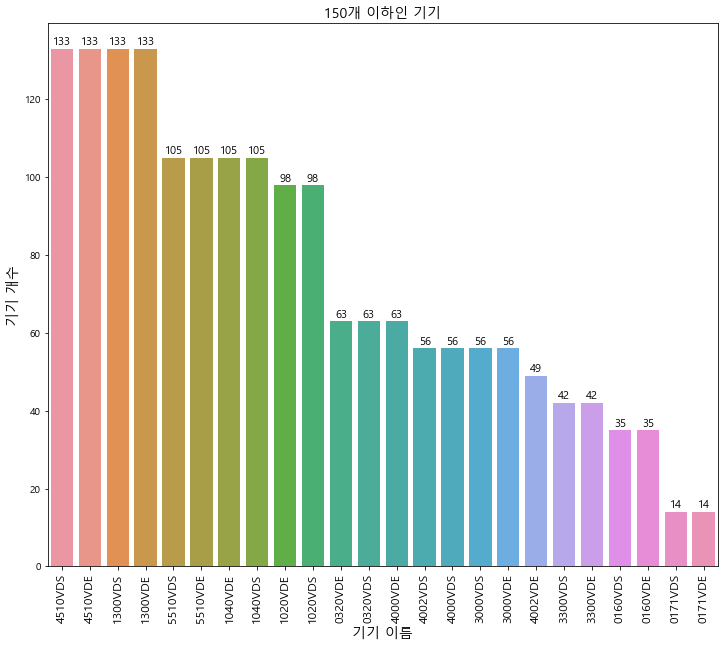

In [37]:
fig = plt.figure(figsize=(18, 6))
ax = sns.barplot(x='VDS',y='count',data = c_500)
for p in ax.patches:
    ax.annotate(format(int(p.get_height()), 'd'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 7), 
                   textcoords = 'offset points',
               fontsize=11)
ax.set_title('150개 이하인 기기', fontsize=14)
ax.set_ylabel('기기 개수', fontsize=14)
ax.set_xlabel('기기 이름', fontsize=14)
# ax.set_title("임산물품목별 데이터 수", fontsize=20)
ax.xaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(rotation=90)
fig.set_size_inches(12, 10)
# fig.savefig("Image/나머지.png",dpi=600)

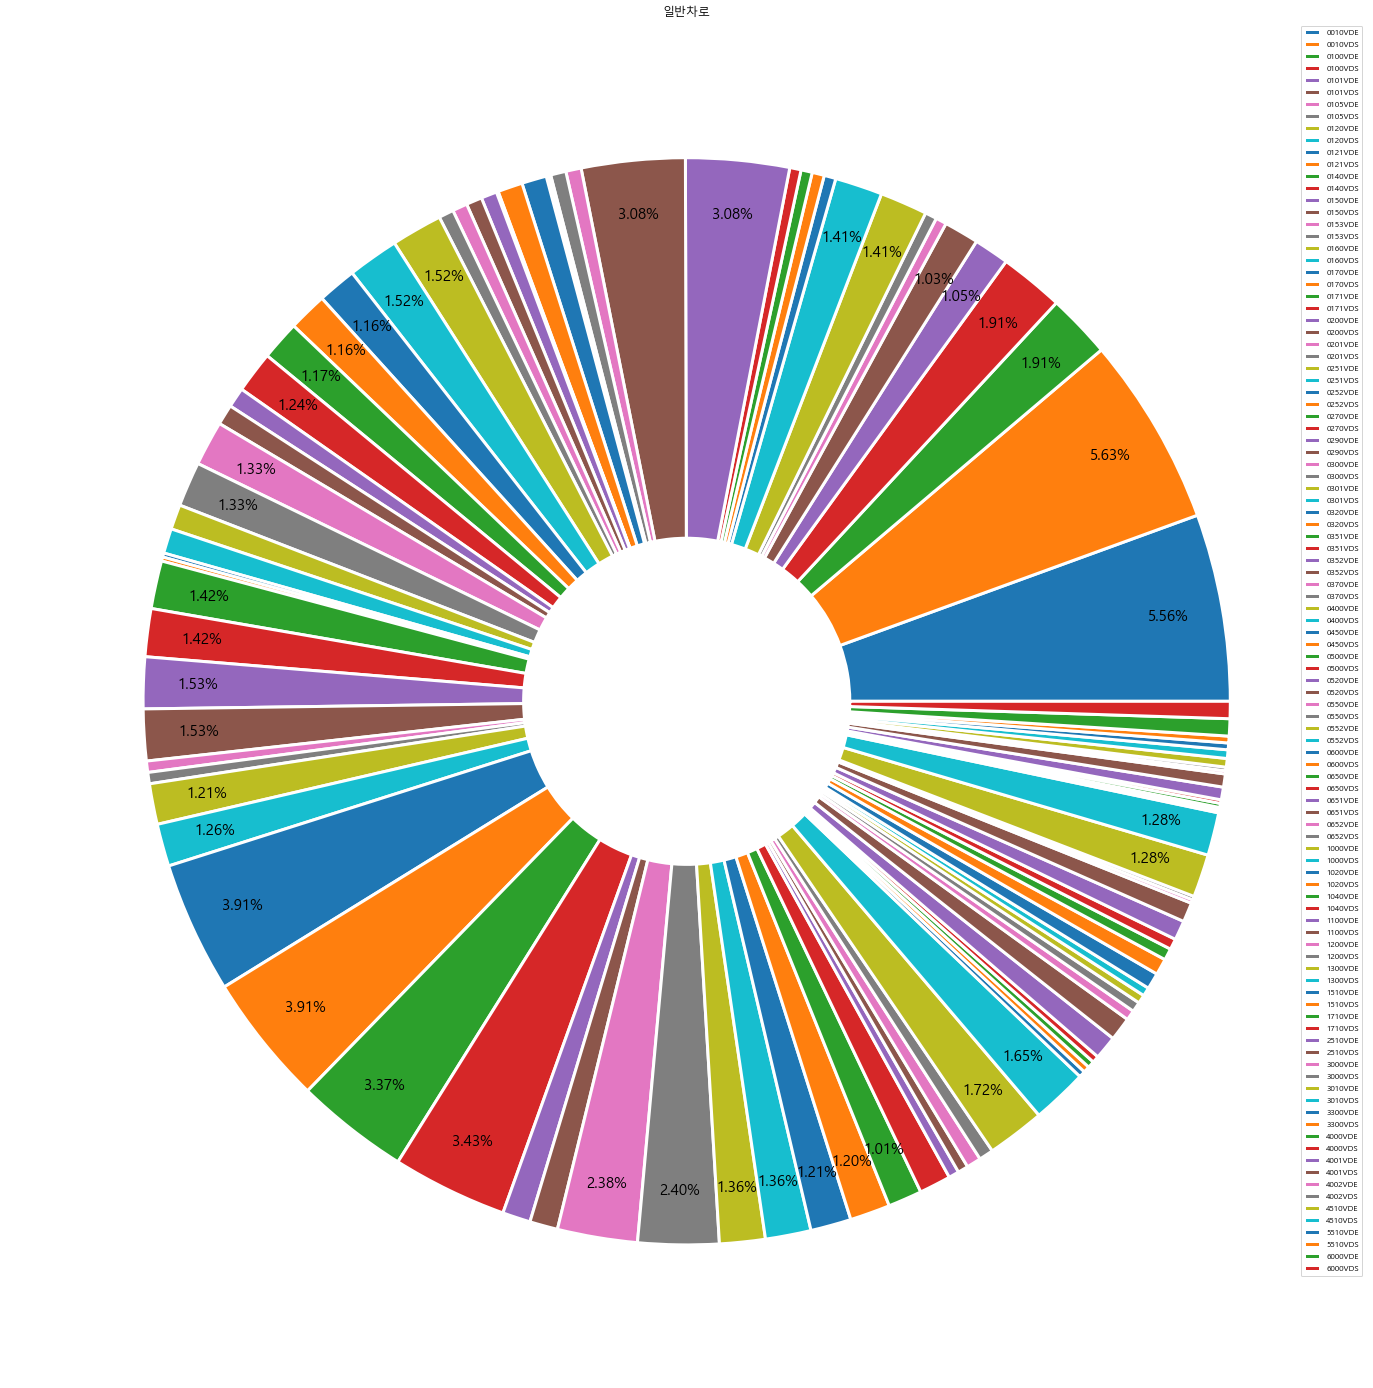

In [38]:
def my_autopct(pct):
    return ('%.2f%%' % pct) if pct > 1 else ''
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 3}
plt.figure(figsize=(25,25))
plt.title("일반차로")
plt.pie(VDS_counter_value,autopct=my_autopct,textprops = {"fontsize":15} , wedgeprops=wedgeprops,pctdistance=0.9)
plt.legend(VDS_counter_categories,prop={'family':font_name, 'size':8}, bbox_to_anchor=(1, 0, 0, 1))

In [39]:
avg_df_2 = new_df[new_df['차로유형구분코드']==2].reset_index(drop=True)
VDS_list_Monday_2 = sorted([str(i)[:7] for i in avg_df_2[avg_df_2['집계일자']==20201012]['VDS_ID']])
VDS_list_Tuesday_2 = sorted([str(i)[:7] for i in avg_df_2[avg_df_2['집계일자']==20201013]['VDS_ID']])
VDS_list_Wednesday_2 = sorted([str(i)[:7] for i in avg_df_2[avg_df_2['집계일자']==20201014]['VDS_ID']])
VDS_list_Thursday_2 = sorted([str(i)[:7] for i in avg_df_2[avg_df_2['집계일자']==20201015]['VDS_ID']])
VDS_list_Friday_2 = sorted([str(i)[:7] for i in avg_df_2[avg_df_2['집계일자']==20201016]['VDS_ID']])
VDS_list_Saturday_2 = sorted([str(i)[:7] for i in avg_df_2[avg_df_2['집계일자']==20201017]['VDS_ID']])
VDS_list_Sunday_2 = sorted([str(i)[:7] for i in avg_df_2[avg_df_2['집계일자']==20201018]['VDS_ID']])

VDS_counter = Counter(VDS_list_Monday_2+VDS_list_Tuesday_2+VDS_list_Wednesday_2+VDS_list_Thursday_2+VDS_list_Friday_2+VDS_list_Saturday_2+VDS_list_Sunday_2)
VDS_counter_value = [VDS_counter[i] for i in VDS_counter.keys()] 
VDS_counter_categories = VDS_counter.keys()

VDS_df = pd.DataFrame(zip(VDS_counter_categories,VDS_counter_value))

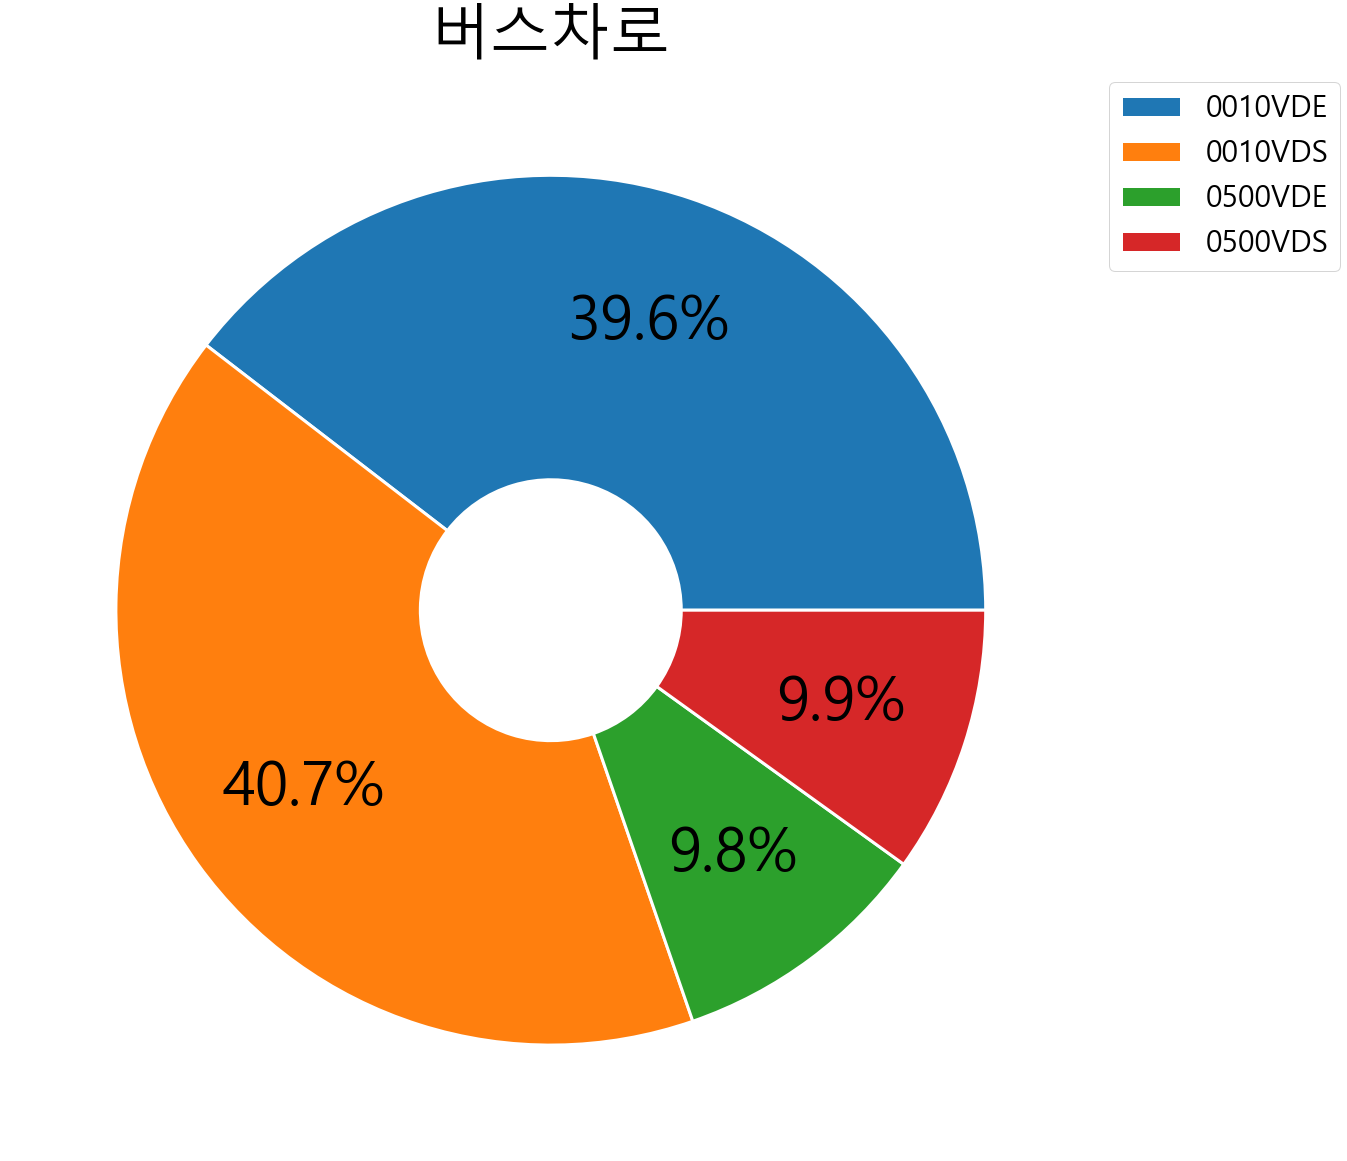

In [40]:
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 3}
plt.figure(figsize=(20,20))
plt.title("버스차로",fontsize=60)
plt.pie(VDS_counter_value,autopct='%0.1f%%',textprops = {"fontsize":60} , wedgeprops=wedgeprops,pctdistance=0.7)
plt.legend(VDS_counter_categories,prop={'family':font_name, 'size':30}, bbox_to_anchor=(1, 0, 0, 1))
# plt.savefig("Image/VDS_counter_버스차로.png",dpi=600)

In [41]:
VDS_list_Monday = sorted(set([str(i) for i in new_df[new_df['집계일자']==20201012]['VDS_ID']]))
VDS_list_Tuesday = sorted(set([str(i) for i in new_df[new_df['집계일자']==20201013]['VDS_ID']]))
VDS_list_Wednesday = sorted(set([str(i) for i in new_df[new_df['집계일자']==20201014]['VDS_ID']]))
VDS_list_Thursday = sorted(set([str(i) for i in new_df[new_df['집계일자']==20201015]['VDS_ID']]))
VDS_list_Friday = sorted(set([str(i) for i in new_df[new_df['집계일자']==20201016]['VDS_ID']]))
VDS_list_Saturday = sorted(set([str(i) for i in new_df[new_df['집계일자']==20201017]['VDS_ID']]))
VDS_list_Sunday = sorted(set([str(i) for i in new_df[new_df['집계일자']==20201018]['VDS_ID']]))
day_df = pd.DataFrame(zip(value_list,line_labels),columns=['데이터 개수','요일'])
# day_df = day_df.set_index("요일")
y_pos = np.arange(len(day_df))

In [42]:
day_df

,데이터 개수,요일
0,7538,Monday
1,7538,Tuesday
2,7538,Wednesday
3,7538,Thursday
4,7536,Friday
5,7857,Saturday
6,7857,Sunday


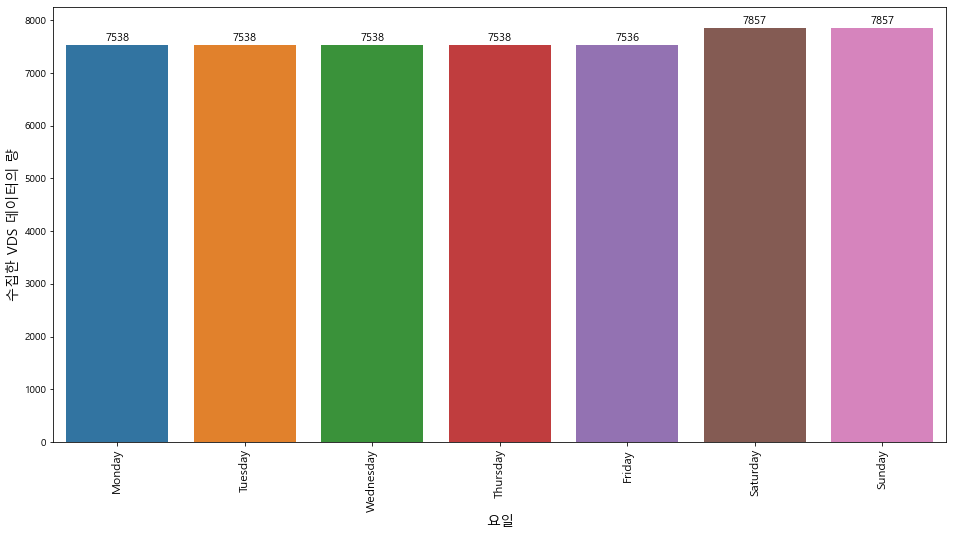

In [43]:
fig = plt.figure(figsize=(16, 8))
ax = sns.barplot(x='요일',y='데이터 개수',data = day_df)
for p in ax.patches:
    ax.annotate(format(int(p.get_height()), 'd'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 7), 
                   textcoords = 'offset points',
               fontsize=11)
ax.set_ylabel('수집한 VDS 데이터의 량', fontsize=14)
ax.set_xlabel('요일', fontsize=14)
# ax.set_title("공사 시작", fontsize=20)
ax.xaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(rotation=90)
# ax.ylim(7000,8000)
# fig.set_size_inches(12, 20)
# fig.savefig("new_Image/요일_VDS_count.png",dpi=600)

In [44]:
date_int = 20201012

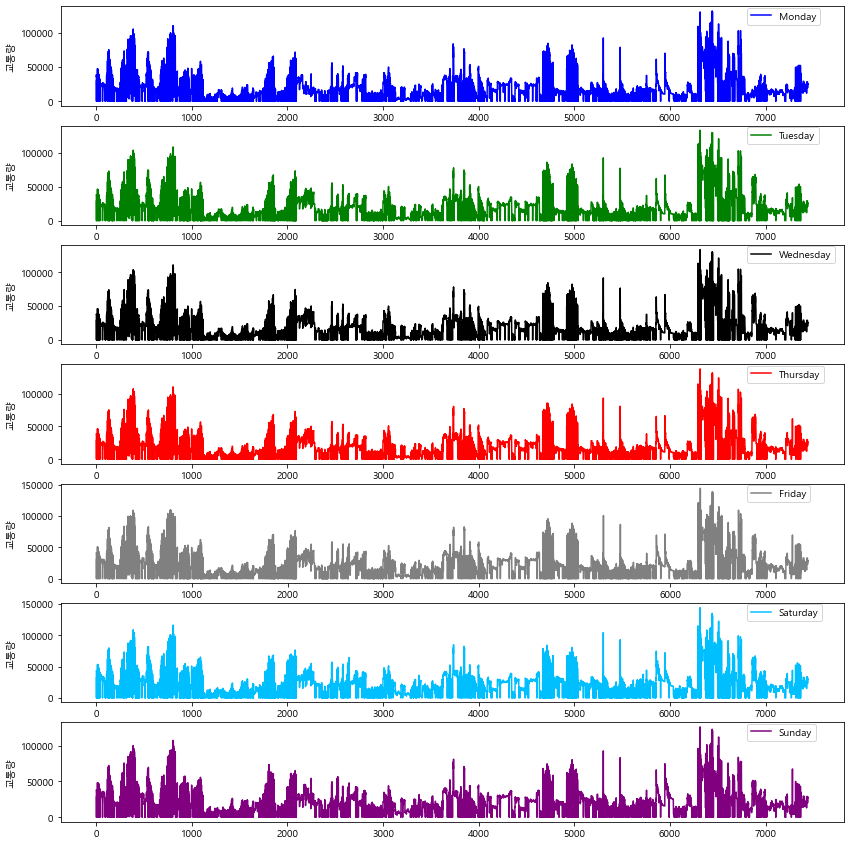

In [45]:
plt.figure(figsize=(15,15))

plt.subplots_adjust(right=0.85)
for i in range(7):
    plt.subplot(7,1,(i+1))
    dff = avg_df_1[avg_df_1['집계일자']==(date_int+i)].sort_values(by='VDS_ID').reset_index(drop=True)
    plt.plot(dff.index,dff['교통량'],label=line_labels[i],color=color_labels[i])
    plt.ylabel("교통량")
    plt.legend(loc='center left',bbox_to_anchor=(0.87, 0.9))
# plt.savefig("new_Image/7일_교통량비교_버스차로_1.png",dpi=600)

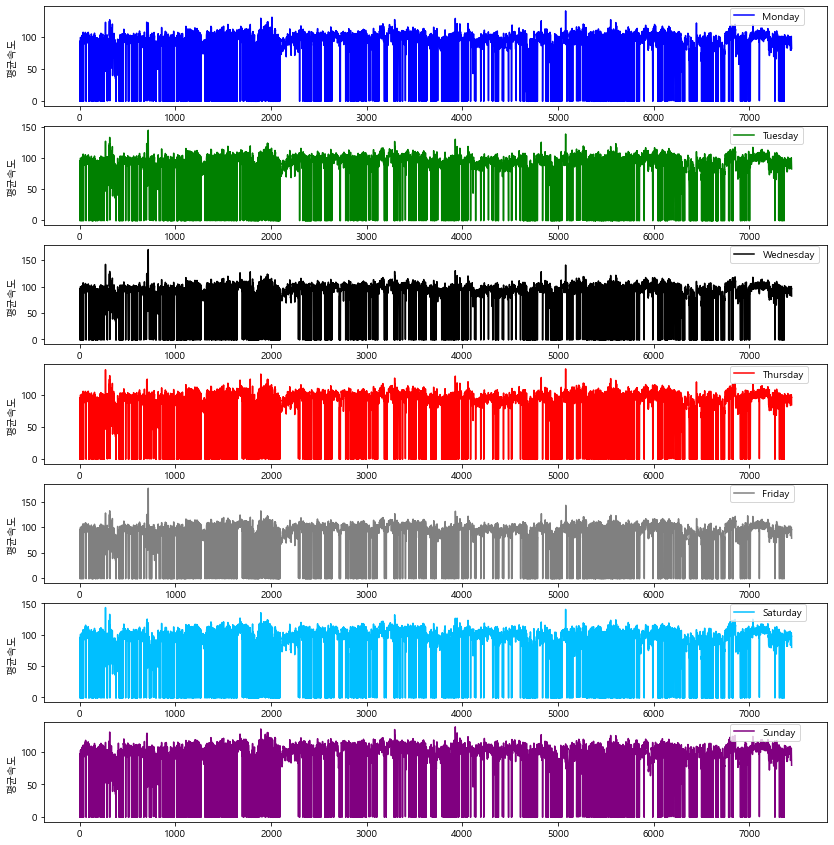

In [46]:
plt.figure(figsize=(15,15))
plt.subplots_adjust(right=0.85)
for i in range(7):
    plt.subplot(7,1,(i+1))
    dff = avg_df_1[avg_df_1['집계일자']==(date_int+i)].sort_values(by='VDS_ID').reset_index(drop=True)
    plt.plot(dff.index,dff['평균속도'],label=line_labels[i],color=color_labels[i])
    plt.ylabel("평균속도")
    plt.legend(loc='center left',bbox_to_anchor=(0.87, 0.9))
# plt.savefig("new_Image/7일_평균속도비교_버스차로_1.png",dpi=600)

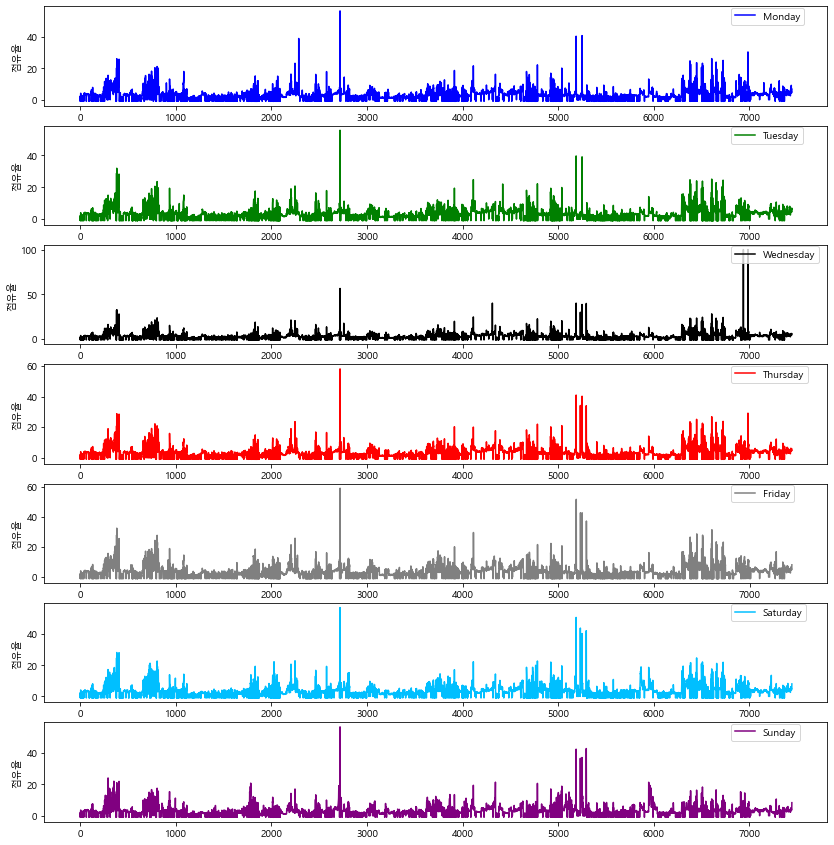

In [47]:
plt.figure(figsize=(15,15))
plt.subplots_adjust(right=0.85)
for i in range(7):
    plt.subplot(7,1,(i+1))
    dff = avg_df_1[avg_df_1['집계일자']==(date_int+i)].sort_values(by='VDS_ID').reset_index(drop=True)
    plt.plot(dff.index,dff['점유율'],label=line_labels[i],color=color_labels[i])
    plt.ylabel("점유율")
    plt.legend(loc='center left',bbox_to_anchor=(0.87, 0.9))
# plt.savefig("new_Image/7일_점유율비교_버스차로_1.png",dpi=600)

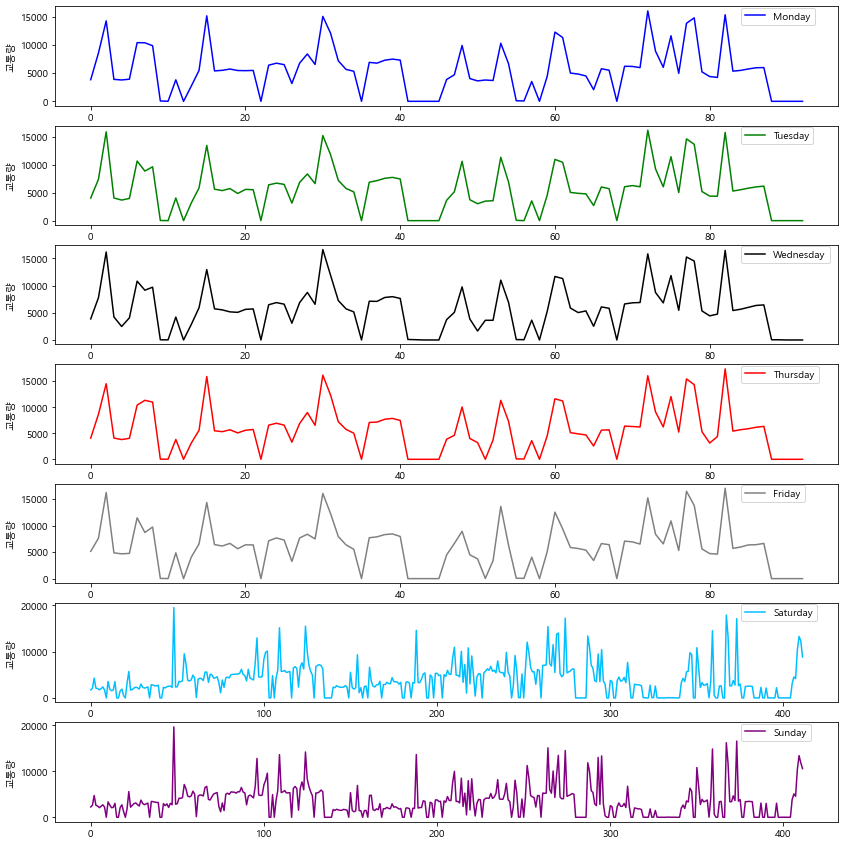

In [48]:
plt.figure(figsize=(15,15))
plt.subplots_adjust(right=0.85)
for i in range(7):
    plt.subplot(7,1,(i+1))
    dff = avg_df_2[avg_df_2['집계일자']==(date_int+i)].sort_values(by='VDS_ID').reset_index(drop=True)
    plt.plot(dff.index,dff['교통량'],label=line_labels[i],color=color_labels[i])
    plt.ylabel("교통량")
    plt.legend(loc='center left',bbox_to_anchor=(0.87, 0.9))
# plt.savefig("new_Image/7일_교통량비교_버스차로_2.png",dpi=600)

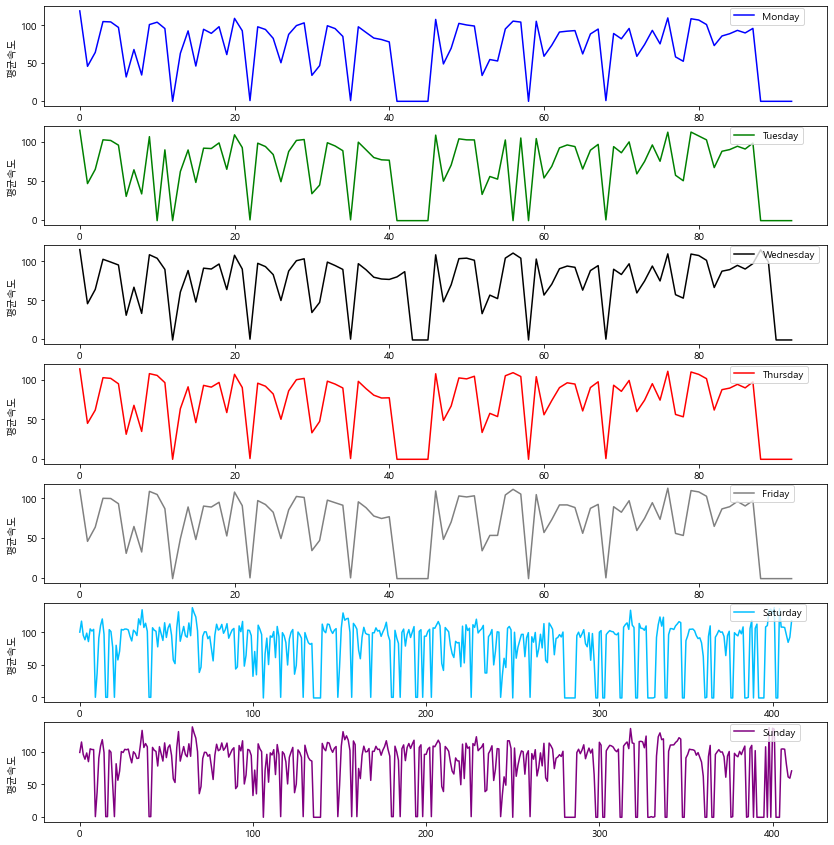

In [49]:
plt.figure(figsize=(15,15))
plt.subplots_adjust(right=0.85)
for i in range(7):
    plt.subplot(7,1,(i+1))
    dff = avg_df_2[avg_df_2['집계일자']==(date_int+i)].sort_values(by='VDS_ID').reset_index(drop=True)
    plt.plot(dff.index,dff['평균속도'],label=line_labels[i],color=color_labels[i])
    plt.ylabel("평균속도")
    plt.legend(loc='center left',bbox_to_anchor=(0.87, 0.9))
# plt.savefig("new_Image/7일_평균속도비교_버스차로_2.png",dpi=600)

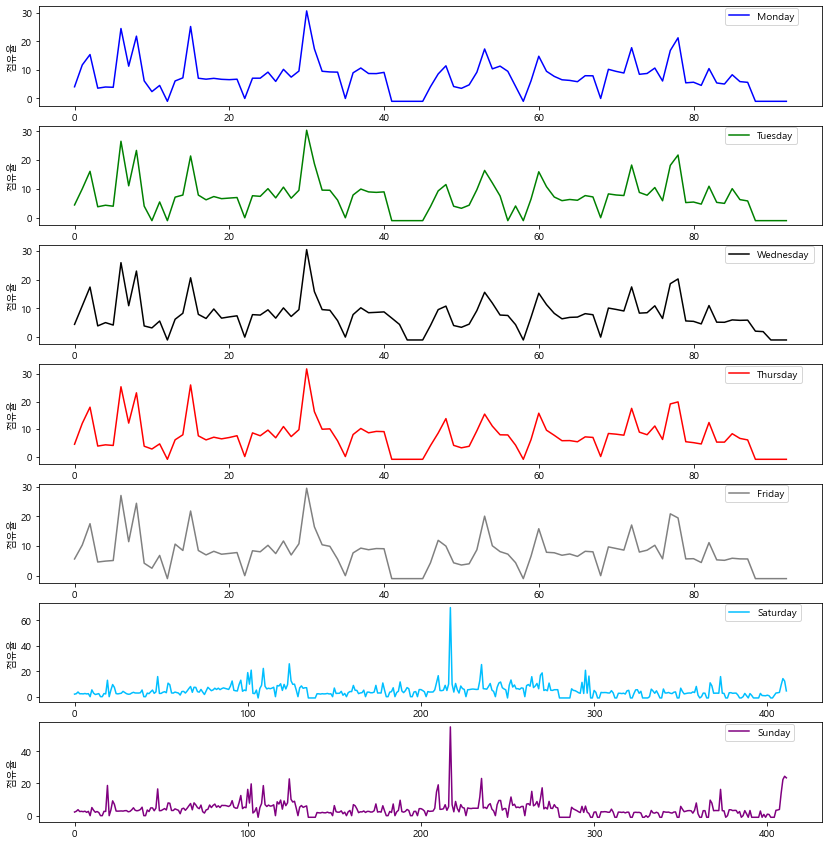

In [50]:
plt.figure(figsize=(15,15))
plt.subplots_adjust(right=0.85)
for i in range(7):
    plt.subplot(7,1,(i+1))
    dff = avg_df_2[avg_df_2['집계일자']==(date_int+i)].sort_values(by='VDS_ID').reset_index(drop=True)
    plt.plot(dff.index,dff['점유율'],label=line_labels[i],color=color_labels[i])
    plt.ylabel("점유율")
    plt.legend(loc='center left',bbox_to_anchor=(0.87, 0.9))
# plt.savefig("new_Image/7일_점유율비교_버스차로_2.png",dpi=600)